# Airbnb Project

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploratory data analysis (EDA)

* Present dataset structure (features, types, distributions)
* Highlight missing values, outliers, distributions, and correlations
* Include rich visualizations (histograms, heatmaps, maps if relevant)

In [59]:
airbnb_train_raw = pd.read_csv("airbnb_train.csv")

In [60]:
# Basic info
print(f"Shape: {airbnb_train_raw.shape}")
airbnb_train_raw.info()
airbnb_train_raw.head()

Shape: (22234, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verif

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


In [61]:
# Quick summary stats
print(f"Cities: {airbnb_train_raw['city'].nunique()}")
print(f"Property types: {airbnb_train_raw['property_type'].nunique()}")
print(f"Average price: ${np.exp(airbnb_train_raw['log_price'].mean()):.2f}")
print(
    f"Price range: ${np.exp(airbnb_train_raw['log_price'].min()):.2f} - ${np.exp(airbnb_train_raw['log_price'].max()):.2f}"
)

Cities: 6
Property types: 31
Average price: $119.52
Price range: $10.00 - $1999.00


In [62]:
# Missing values summary
missing = airbnb_train_raw.isnull().sum()
missing_pct = (missing / len(airbnb_train_raw)) * 100
missing_df = (
    pd.DataFrame({"Count": missing, "Percentage": missing_pct})
    .query("Count > 0")
    .sort_values("Percentage", ascending=False)
)

print(missing_df)

                        Count  Percentage
host_response_rate       5475   24.624449
review_scores_rating     4978   22.389134
first_review             4725   21.251237
last_review              4716   21.210758
neighbourhood            2086    9.382028
zipcode                   303    1.362778
host_has_profile_pic       56    0.251867
host_identity_verified     56    0.251867
host_since                 56    0.251867
bathrooms                  51    0.229378
beds                       35    0.157417
bedrooms                   26    0.116938


Log price stats:
count    22234.000000
mean         4.783481
std          0.718758
min          2.302585
25%          4.317488
50%          4.700480
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


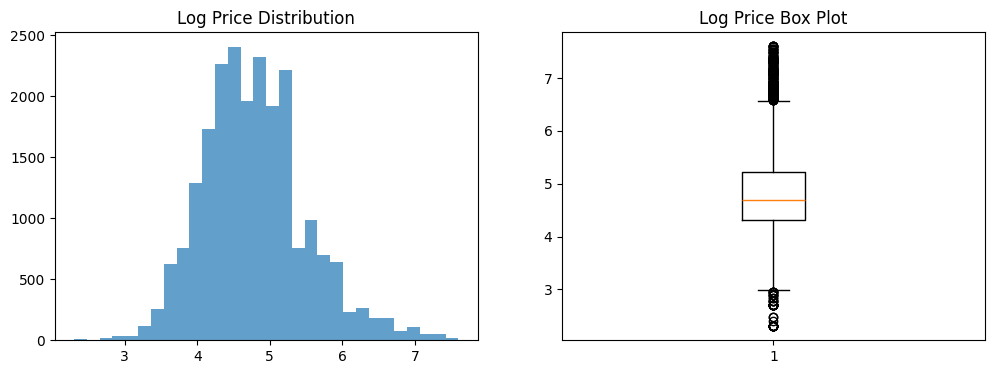

In [63]:
# Distribution and basic stats
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(airbnb_train_raw["log_price"], bins=30, alpha=0.7)
axes[0].set_title("Log Price Distribution")

axes[1].boxplot(airbnb_train_raw["log_price"])
axes[1].set_title("Log Price Box Plot")

print(f"Log price stats:\n{airbnb_train_raw['log_price'].describe()}")

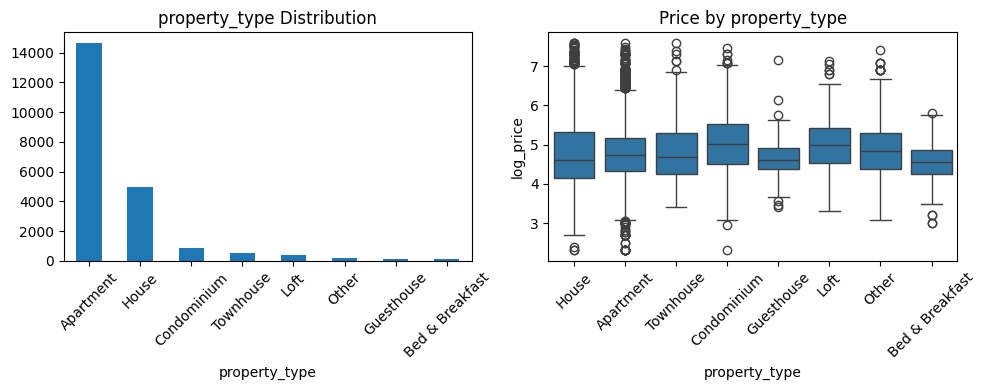

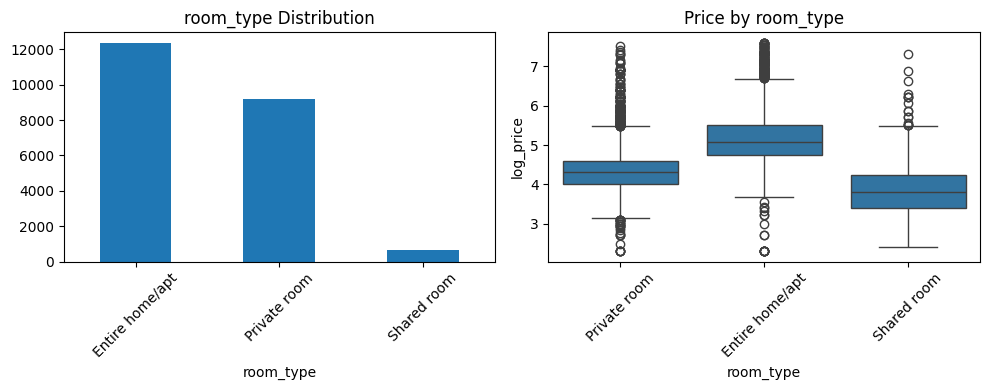

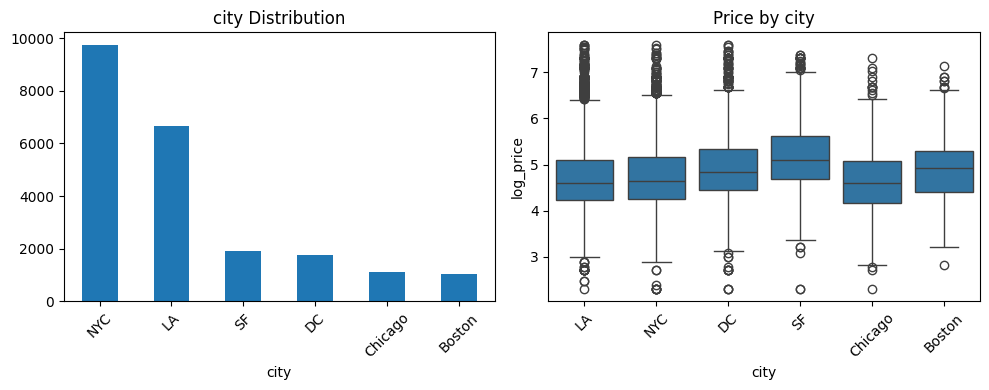

In [64]:
# Most important categorical features
key_cats = ["property_type", "room_type", "city"]

for cat in key_cats:
    plt.figure(figsize=(10, 4))

    # Distribution
    plt.subplot(1, 2, 1)
    airbnb_train_raw[cat].value_counts().head(8).plot(kind="bar")
    plt.title(f"{cat} Distribution")
    plt.xticks(rotation=45)

    # Price by category
    plt.subplot(1, 2, 2)
    top_cats = airbnb_train_raw[cat].value_counts().head(8).index
    df_filtered = airbnb_train_raw[airbnb_train_raw[cat].isin(top_cats)]
    sns.boxplot(data=df_filtered, x=cat, y="log_price")
    plt.title(f"Price by {cat}")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

Correlations with log_price:
log_price            1.000000
accommodates         0.564874
bedrooms             0.472871
bathrooms            0.369118
number_of_reviews   -0.039138
Name: log_price, dtype: float64


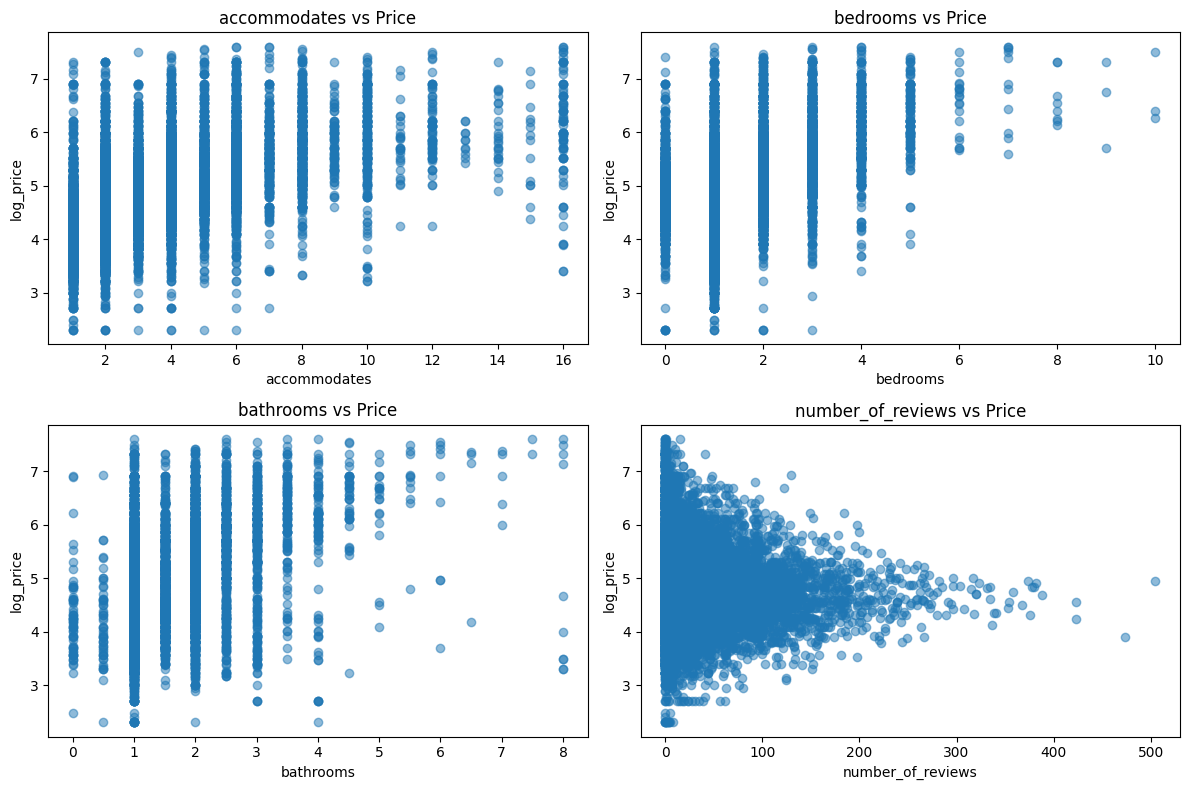

In [65]:
# Key numerical features
num_vars = ["accommodates", "bedrooms", "bathrooms", "number_of_reviews"]

# Correlation with target
correlations = (
    airbnb_train_raw[num_vars + ["log_price"]]
    .corr()["log_price"]
    .sort_values(ascending=False)
)
print("Correlations with log_price:")
print(correlations)

# Quick scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    axes[i].scatter(airbnb_train_raw[var], airbnb_train_raw["log_price"], alpha=0.5)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("log_price")
    axes[i].set_title(f"{var} vs Price")

plt.tight_layout()

## Preprocessing and feature engineering steps

‼️ It could've been interesting to extract the amenities from its column if it had an already an uniformized format, but it's not the case.

Due to a lack of time, I chose not to linger on this column.

In [66]:
airbnb_train = airbnb_train_raw.copy()

In [67]:
# Create new features
airbnb_train["price_per_person"] = (
    np.exp(airbnb_train["log_price"]) / airbnb_train["accommodates"]
)
airbnb_train["beds_per_bedroom"] = airbnb_train["beds"] / airbnb_train[
    "bedrooms"
].replace(0, 1)
airbnb_train["amenity_count"] = airbnb_train["amenities"].str.count(",") + 1

# Handle outliers
airbnb_train["accommodates"] = airbnb_train["accommodates"].clip(upper=12)
airbnb_train["bathrooms"] = airbnb_train["bathrooms"].clip(upper=6)

# One-hot encode key categorical variables
key_cats = ["room_type", "property_type", "city", "cancellation_policy"]
df_encoded = pd.get_dummies(airbnb_train, columns=key_cats, drop_first=True)

## Model training and evaluation

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def basic_pipeline(df):
    df = df.dropna(subset=["bathrooms", "bedrooms", "beds"])

    df_processed = pd.get_dummies(
        df, columns=["room_type", "property_type", "city"], drop_first=True
    )

    # Select numeric features only
    numeric_features = df_processed.select_dtypes(include=[np.number]).columns
    numeric_features = numeric_features.drop(
        ["id", "log_price"]
    )  # Remove target and ID

    # NEW: Handle remaining missing values
    X = df_processed[numeric_features].fillna(0)  # or use median/mean
    y = df_processed["log_price"]

    return X, y

In [69]:
def advanced_pipeline(df, is_test=False):
    """Process data for training or testing"""
    # Handle missing values strategically
    df = df.copy()
    df = df.dropna(subset=["bathrooms", "bedrooms", "beds"])

    # Get IDs after dropping rows
    remaining_ids = df["id"].copy() if "id" in df.columns else None

    # Fill missing values
    df["review_scores_rating"] = df["review_scores_rating"].fillna(
        df["review_scores_rating"].median()
    )
    df["host_response_rate"] = pd.to_numeric(
        df["host_response_rate"].str.replace("%", ""), errors="coerce"
    ).fillna(0)

    # Feature engineering - only if not test data and log_price exists
    if not is_test and "log_price" in df.columns:
        df["price_per_person"] = np.exp(df["log_price"]) / df["accommodates"]

    df["amenity_count"] = df["amenities"].str.count(",") + 1
    df["beds_per_bedroom"] = df["beds"] / df["bedrooms"].replace(0, 1)

    # Handle outliers
    df["accommodates"] = df["accommodates"].clip(upper=12)
    df["bathrooms"] = df["bathrooms"].clip(upper=6)

    df_processed = pd.get_dummies(
        df,
        columns=["room_type", "property_type", "city", "cancellation_policy"],
        drop_first=True,
    )

    numeric_features = df_processed.select_dtypes(include=[np.number]).columns
    columns_to_exclude = ["id", "latitude", "longitude"]
    if "log_price" in numeric_features:
        columns_to_exclude.append("log_price")

    existing_columns_to_drop = [
        col for col in columns_to_exclude if col in numeric_features
    ]
    numeric_features = numeric_features.drop(existing_columns_to_drop)

    if is_test:
        return df_processed[numeric_features], remaining_ids
    else:
        return df_processed[numeric_features], df_processed["log_price"]

In [70]:
from sklearn.feature_selection import SelectKBest, f_regression


def feature_selection_pipeline(df, is_test=False, k=7):
    X, y = advanced_pipeline(df, is_test=is_test)

    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    return pd.DataFrame(X_selected, columns=selected_features), y

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, random_state=42, max_depth=10
    ),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

In [72]:
def evaluate_models(X, y, models, pipeline_name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = []

    baseline_pred = np.full(len(y_test), y_train.mean())
    baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
    baseline_r2 = r2_score(y_test, baseline_pred)

    print(f"\n=== {pipeline_name} ===")
    print(f"Baseline RMSE: {baseline_rmse:.4f}")
    print(f"Baseline R²: {baseline_r2:.4f}")
    print("-" * 50)

    for name, model in models.items():
        # Use scaled data for linear models, original for tree-based
        if "Linear" in name or "Ridge" in name or "Lasso" in name:
            X_train_use, X_test_use = X_train_scaled, X_test_scaled
        else:
            X_train_use, X_test_use = X_train, X_test

        model.fit(X_train_use, y_train)

        y_pred = model.predict(X_test_use)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        cv_scores = cross_val_score(
            model, X_train_use, y_train, cv=5, scoring="neg_mean_squared_error"
        )
        cv_rmse = np.sqrt(-cv_scores.mean())
        cv_std = np.sqrt(cv_scores.std())

        results.append(
            {
                "Model": name,
                "RMSE": rmse,
                "R²": r2,
                "MAE": mae,
                "CV_RMSE": cv_rmse,
                "CV_Std": cv_std,
            }
        )

        print(
            f"{name:15} | RMSE: {rmse:.4f} | R²: {r2:.4f} | CV_RMSE: {cv_rmse:.4f} ± {cv_std:.4f}"
        )

    return pd.DataFrame(results)

In [73]:
import warnings

warnings.filterwarnings(
    "ignore"
)  # dirty but I couldn't find a way to fix the problematic values

pipelines = {
    "Basic": basic_pipeline,
    "Advanced": advanced_pipeline,
    "Feature Selection": feature_selection_pipeline,
}

all_results = []

for pipeline_name, pipeline_func in pipelines.items():
    X, y = pipeline_func(airbnb_train_raw)
    results = evaluate_models(X, y, models, pipeline_name)
    results["Pipeline"] = pipeline_name
    all_results.append(results)

final_results = pd.concat(all_results, ignore_index=True)

best_model = final_results.loc[final_results["RMSE"].idxmin()]
print(f"\nBest Model: {best_model['Model']} with {best_model['Pipeline']} pipeline")
print(f"RMSE: {best_model['RMSE']:.4f}")
print(f"R²: {best_model['R²']:.4f}")


=== Basic ===
Baseline RMSE: 0.7203
Baseline R²: -0.0003
--------------------------------------------------
Linear Regression | RMSE: 0.5814 | R²: 0.3481 | CV_RMSE: 0.5740 ± 0.1069
Ridge Regression | RMSE: 0.5814 | R²: 0.3481 | CV_RMSE: 0.5740 ± 0.1069
Lasso Regression | RMSE: 0.6000 | R²: 0.3058 | CV_RMSE: 0.5979 ± 0.1157
Decision Tree   | RMSE: 0.5015 | R²: 0.5151 | CV_RMSE: 0.4995 ± 0.0772
Random Forest   | RMSE: 0.4577 | R²: 0.5961 | CV_RMSE: 0.4518 ± 0.0607
Gradient Boosting | RMSE: 0.4567 | R²: 0.5977 | CV_RMSE: 0.4499 ± 0.0753

=== Advanced ===
Baseline RMSE: 0.7203
Baseline R²: -0.0003
--------------------------------------------------
Linear Regression | RMSE: 0.4238 | R²: 0.6537 | CV_RMSE: 0.3766 ± 0.1075
Ridge Regression | RMSE: 0.4238 | R²: 0.6537 | CV_RMSE: 0.3766 ± 0.1075
Lasso Regression | RMSE: 0.4317 | R²: 0.6407 | CV_RMSE: 0.4164 ± 0.0852
Decision Tree   | RMSE: 0.0444 | R²: 0.9962 | CV_RMSE: 0.0432 ± 0.0212
Random Forest   | RMSE: 0.0330 | R²: 0.9979 | CV_RMSE: 0.03

The Random Forest with Feature Selection is the winner with 99% R² and 0.03 RMSE ! It could be interesting to note that it almost gives the same results as the Advanced Pipeline alone, which shows us that the feature selection isn't really significant in our dataset case.

In [74]:
print("Processing training data...")
X_train, y_train = feature_selection_pipeline(airbnb_train_raw, is_test=False)
train_features = X_train.columns

# Step 2: Load and process test data
print("\nLoading and processing test data...")
airbnb_test_df = pd.read_csv("airbnb_test.csv")

X_test, test_ids = feature_selection_pipeline(airbnb_test_df, is_test=True)

# Step 3: Align test features with training features
missing_in_test = set(train_features) - set(X_test.columns)
extra_in_test = set(X_test.columns) - set(train_features)

print(f"\nFeature alignment:")
print(f"Features missing in test: {len(missing_in_test)}")
print(f"Extra features in test: {len(extra_in_test)}")

# Add missing features as zeros
for feature in missing_in_test:
    X_test[feature] = 0

# Keep only training features in the same order
X_test = X_test.reindex(columns=train_features, fill_value=0)

# Step 4: Train model
print("\nTraining model...")
best_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
best_model.fit(X_train, y_train)

print("Making predictions...")
predicted_log_prices = best_model.predict(X_test)
predicted_actual_prices = np.exp(predicted_log_prices)  # Convert from log scale

submission = pd.DataFrame(
    {
        "id": test_ids,  # Use the IDs that survived preprocessing
        "logpred": predicted_log_prices,
    }
)
submission.to_csv("submission.csv", index=False)

Processing training data...

Loading and processing test data...

Feature alignment:
Features missing in test: 3
Extra features in test: 3

Training model...
Making predictions...


## Visualizations and markdown explanations

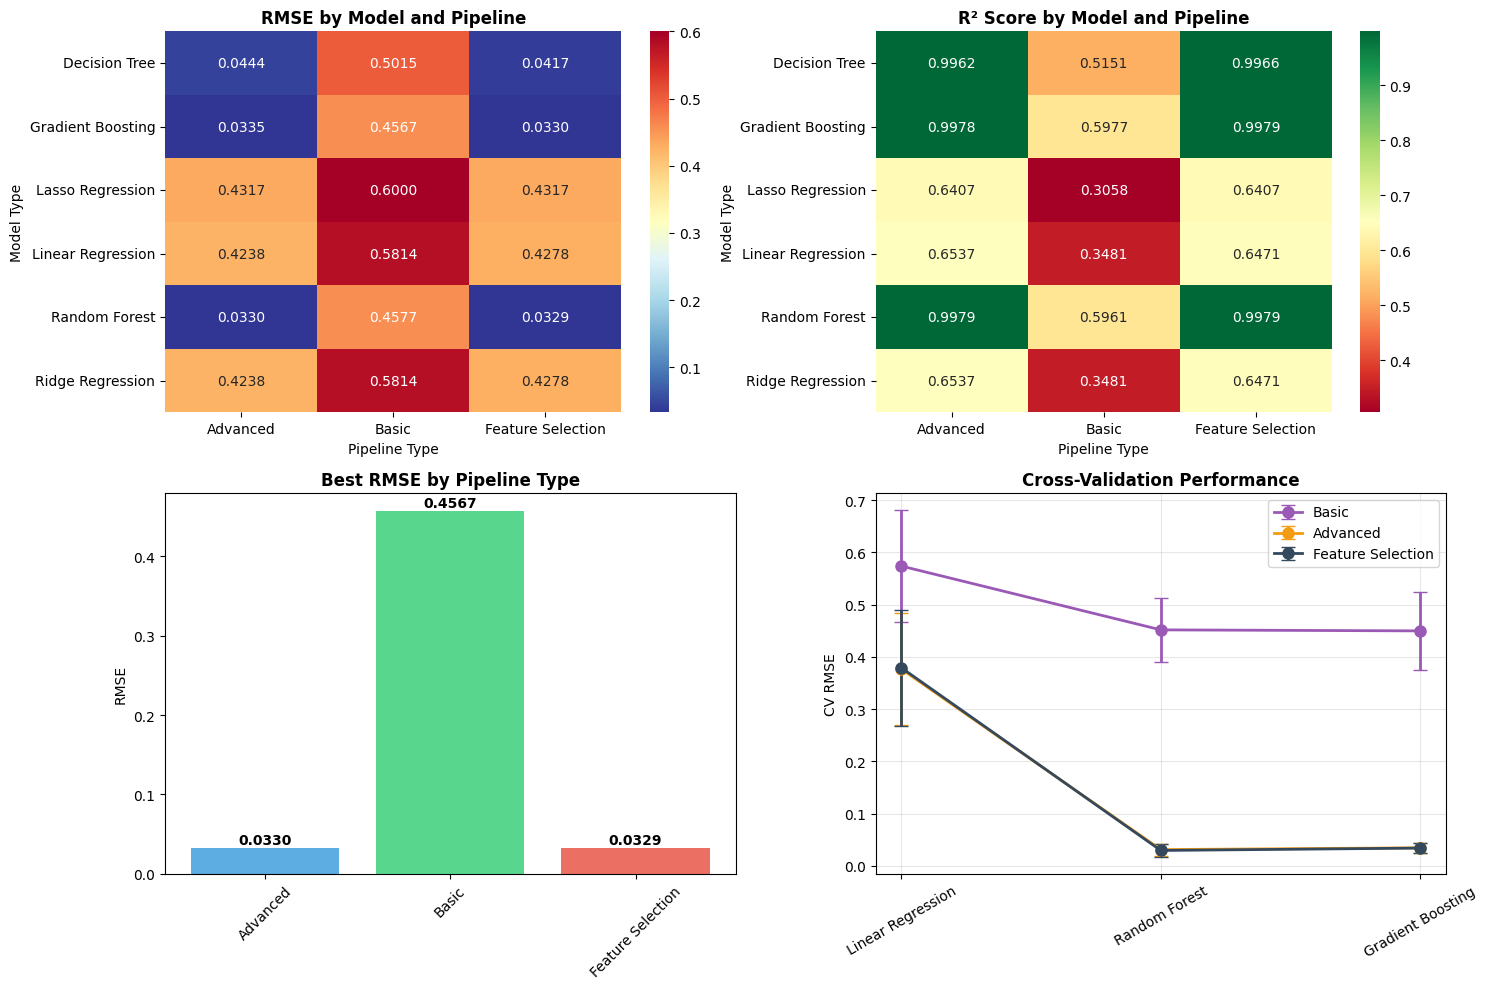

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Model Performance Comparison - RMSE Heatmap
models_comparison = final_results.pivot(
    index="Model", columns="Pipeline", values="RMSE"
)
sns.heatmap(models_comparison, annot=True, fmt=".4f", cmap="RdYlBu_r", ax=axes[0, 0])
axes[0, 0].set_title("RMSE by Model and Pipeline", fontsize=12, weight="bold")
axes[0, 0].set_xlabel("Pipeline Type")
axes[0, 0].set_ylabel("Model Type")

# 2. R² Score Comparison Heatmap
r2_comparison = final_results.pivot(index="Model", columns="Pipeline", values="R²")
sns.heatmap(r2_comparison, annot=True, fmt=".4f", cmap="RdYlGn", ax=axes[0, 1])
axes[0, 1].set_title("R² Score by Model and Pipeline", fontsize=12, weight="bold")
axes[0, 1].set_xlabel("Pipeline Type")
axes[0, 1].set_ylabel("Model Type")

# 3. Best Models by Pipeline
best_by_pipeline = final_results.loc[final_results.groupby("Pipeline")["RMSE"].idxmin()]
bars = axes[1, 0].bar(
    best_by_pipeline["Pipeline"],
    best_by_pipeline["RMSE"],
    color=["#3498db", "#2ecc71", "#e74c3c"],
    alpha=0.8,
)
axes[1, 0].set_title("Best RMSE by Pipeline Type", fontsize=12, weight="bold")
axes[1, 0].set_ylabel("RMSE")
axes[1, 0].tick_params(axis="x", rotation=45)
# Add value labels on bars
for bar, value in zip(bars, best_by_pipeline["RMSE"]):
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.001,
        f"{value:.4f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 4. Cross-validation Performance with Error Bars
cv_models = ["Random Forest", "Gradient Boosting", "Linear Regression"]
cv_data = final_results[final_results["Model"].isin(cv_models)]
colors = ["#9b59b6", "#f39c12", "#34495e"]
for i, pipeline in enumerate(cv_data["Pipeline"].unique()):
    pipeline_data = cv_data[cv_data["Pipeline"] == pipeline]
    axes[1, 1].errorbar(
        pipeline_data["Model"],
        pipeline_data["CV_RMSE"],
        yerr=pipeline_data["CV_Std"],
        marker="o",
        markersize=8,
        label=pipeline,
        capsize=5,
        color=colors[i],
        linewidth=2,
    )
axes[1, 1].set_title("Cross-Validation Performance", fontsize=12, weight="bold")
axes[1, 1].set_ylabel("CV RMSE")
axes[1, 1].legend()
axes[1, 1].tick_params(axis="x", rotation=30)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Performance Analysis

Tree-based models (Random Forest and Gradient Boosting) significantly outperformed linear models with RMSE around 0.033 versus 0.42-0.60 for linear methods.

The data shows non-linear pricing patterns that tree models handle well but linear models cannot. Room types have clear price jumps - entire homes cost much more than private rooms, creating step-like patterns. Property capacity shows diminishing returns rather than straight-line relationships. Geographic differences create city-specific pricing rules that trees can capture through splits.

Linear models assume straight-line relationships and simple additive effects. The Airbnb data violates these assumptions with threshold effects, interaction patterns, and categorical hierarchies that require complex feature engineering to model linearly.

The Basic pipeline performed poorly across all models, while Advanced and Feature Selection pipelines achieved better results although similar between themselves. This suggests the Basic approach inadequately processed the mixed categorical, numerical, and text features.

Random Forest with the Advanced pipeline provides the best combination of accuracy and stability for this pricing prediction task, effectively capturing the complex non-linear relationships in Airbnb rental data.